# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [45]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [46]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [47]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

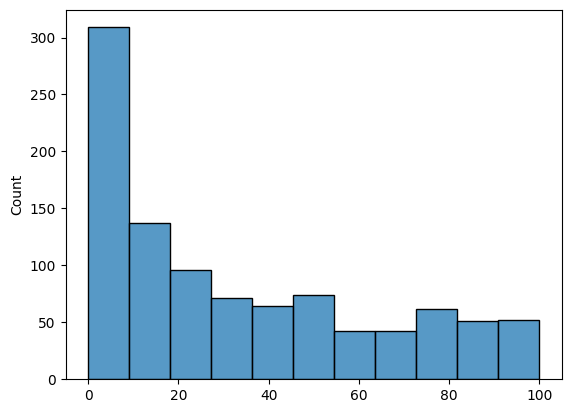

In [48]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [49]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52])

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

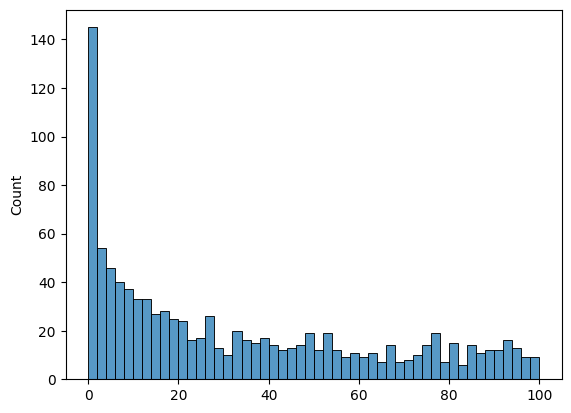

In [50]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

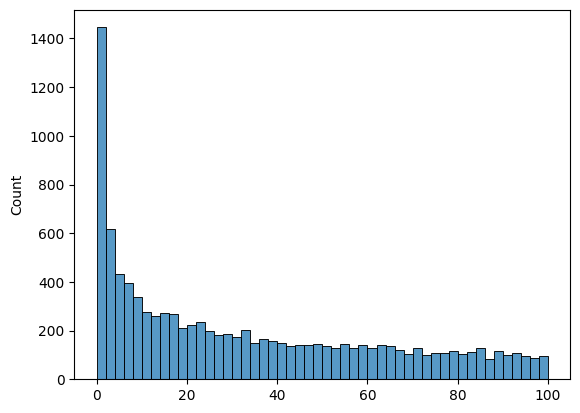

In [51]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

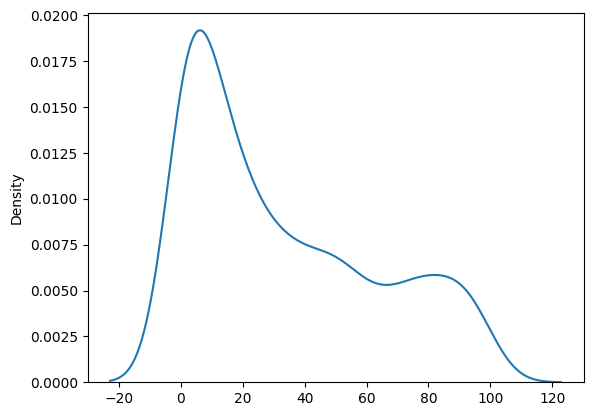

In [52]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

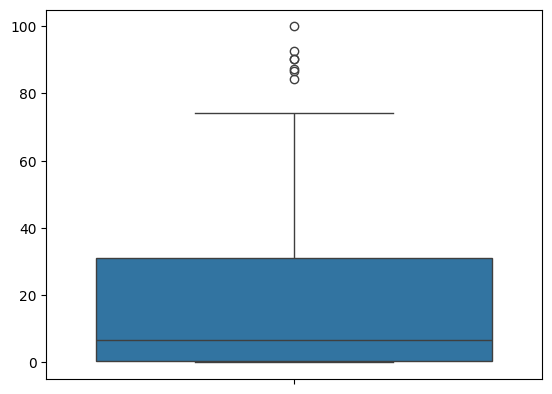

In [53]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

<Axes: >

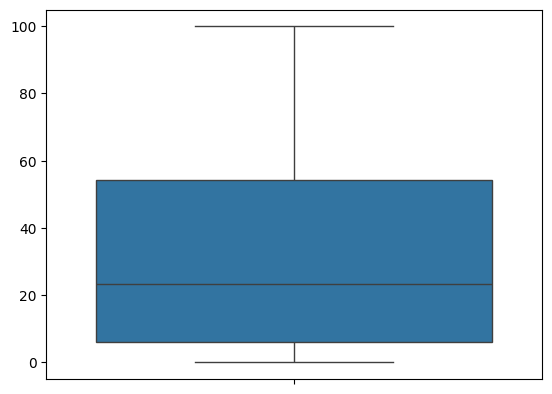

In [54]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

<Axes: >

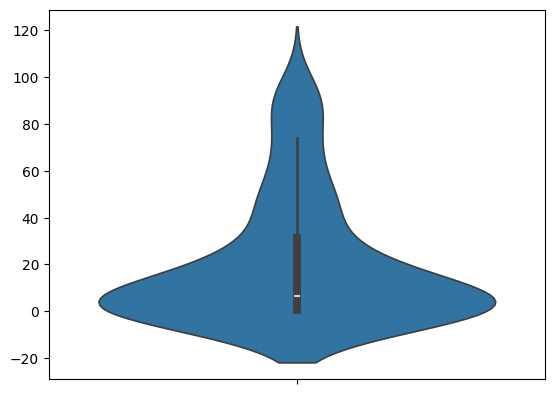

In [55]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

<Axes: >

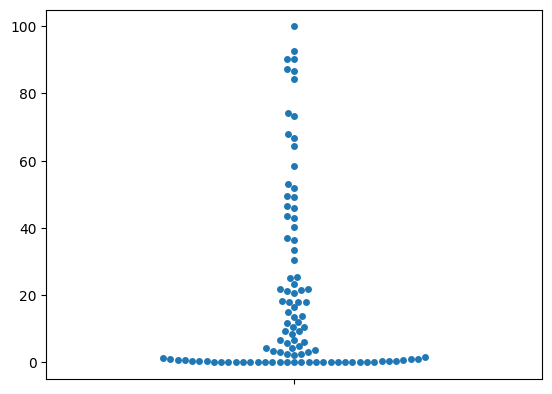

In [56]:
sns.swarmplot(lesson_series_3)

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [57]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [58]:
histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [59]:
pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

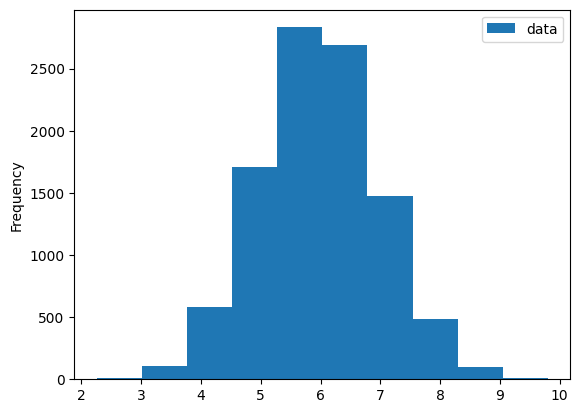

In [60]:
df.plot.hist()

For Histogram:

I will add axis labels (e.g., Body Length (inches) and Number of Birds).

Title the chart (e.g., Distribution of Bird Body Lengths).

Use gridlines or annotations for clarity.

Consider color coding or overlays (e.g., a normal curve).

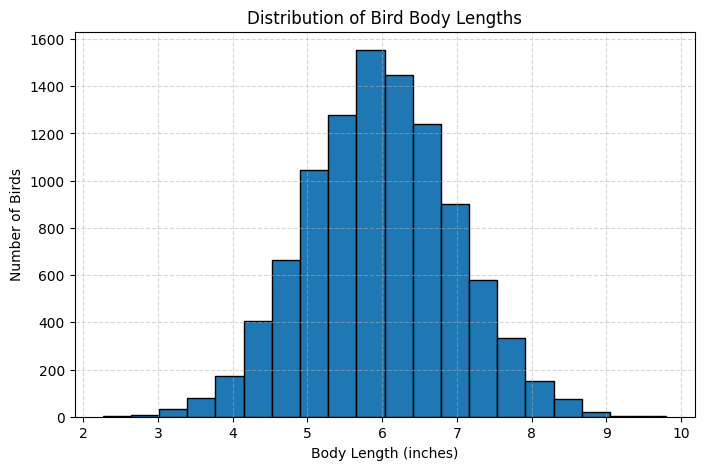

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
num_data = 10000
data = np.random.normal(size=num_data) + 6
df = pd.DataFrame(data, columns=["Body Length (in)"])

plt.figure(figsize=(8, 5))
plt.hist(df["Body Length (in)"], bins=20, edgecolor='black')
plt.xlabel("Body Length (inches)")
plt.ylabel("Number of Birds")
plt.title("Distribution of Bird Body Lengths")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

For the Table:

Format bin ranges as "min–max" (e.g., "5.0–5.2").

Round bin values for readability.

Sort by bin start or center.

Optionally highlight the bin with the highest count.

In [62]:
np.random.seed(0)
num_data = 10000
data = np.random.normal(size=num_data) + 6
df = pd.DataFrame(data, columns=["Body Length (in)"])

histcounts, binedges = np.histogram(df["Body Length (in)"], bins=20)
histmins = binedges[:-1]
histmaxes = binedges[1:]

bin_ranges = [f"{round(minv, 2)}-{round(maxv, 2)}" for minv, maxv in zip(histmins, histmaxes)]

hist_table = pd.DataFrame({
    "Bin Range (in)": bin_ranges,
    "Count": histcounts
})

print(hist_table)

   Bin Range (in)  Count
0       2.26-2.64      2
1       2.64-3.01      8
2       3.01-3.39     31
3       3.39-3.77     79
4       3.77-4.15    172
5       4.15-4.52    407
6        4.52-4.9    665
7        4.9-5.28   1045
8       5.28-5.65   1280
9       5.65-6.03   1553
10      6.03-6.41   1449
11      6.41-6.78   1239
12      6.78-7.16    900
13      7.16-7.54    579
14      7.54-7.92    335
15      7.92-8.29    152
16      8.29-8.67     75
17      8.67-9.05     22
18      9.05-9.42      5
19       9.42-9.8      2


# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [63]:
num_visits = 10000
np.random.seed(0)

In [64]:
df = pd.DataFrame(columns = ["VisitDate"])

In [65]:
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [66]:
df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [67]:
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

In [68]:
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

In [69]:
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

In [70]:
df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

In [71]:
df.iloc[0:5]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
0,2010-01-01,False,0,1,4,10.30
1,2010-01-01,True,3,0,0,38.77
2,2010-01-01,True,0,0,0,79.34
3,2010-01-01,True,0,0,1,87.84
4,2010-01-02,False,0,1,2,18.65


1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.

In [72]:
ride_cols = ["MartianRide", "TeacupRide", "RiverRide"]
ride_stats = df[ride_cols].agg(["mean", "median"])
ride_stats.loc["mode"] = df[ride_cols].mode().iloc[0]
print(ride_stats)

        MartianRide  TeacupRide  RiverRide
mean         0.9073      0.5862     1.2007
median       0.0000      0.0000     1.0000
mode         0.0000      0.0000     0.0000


2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [73]:
grouped = df.groupby("VisitDate")[["MartianRide", "TeacupRide", "RiverRide"]]
daily_mean_median = grouped.agg(["mean", "median"])

daily_mode = grouped.apply(lambda x: x.mode().iloc[0])

daily_mode.columns = pd.MultiIndex.from_product([daily_mode.columns, ["mode"]])

daily_stats = pd.concat([daily_mean_median, daily_mode], axis=1)

daily_stats = daily_stats.sort_index(axis=1)

daily_stats.head()

MartianRide             RiverRide             TeacupRide         \
                  mean median mode      mean median mode       mean median   
VisitDate                                                                    
2010-01-01        0.75    0.0  0.0      1.25    0.5  0.0       0.25    0.0   
2010-01-02        0.00    0.0  0.0      2.00    2.0  2.0       1.00    1.0   
2010-01-03        0.00    0.0  0.0      1.25    0.5  0.0       1.50    0.5   
2010-01-04        0.00    0.0  0.0      1.00    1.0  1.0       0.00    0.0   
2010-01-05        0.50    0.5  0.0      0.00    0.0  0.0       0.00    0.0   

                 
           mode  
VisitDate        
2010-01-01  0.0  
2010-01-02  1.0  
2010-01-03  0.0  
2010-01-04  0.0  
2010-01-05  0.0

3. Find the standard deviation and variance of the count for each ride.

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

In [74]:
daily_counts = df.groupby("VisitDate")[["MartianRide", "TeacupRide", "RiverRide"]].sum()
ride_variance = daily_counts.var()
ride_std = daily_counts.std()
print("Variance of Daily Ride Counts:\n", ride_variance)
print("\nStandard Deviation of Daily Ride Counts:\n", ride_std)

Variance of Daily Ride Counts:
 MartianRide    11.451523
TeacupRide      3.893552
RiverRide       5.949874
dtype: float64

Standard Deviation of Daily Ride Counts:
 MartianRide    3.384010
TeacupRide     1.973209
RiverRide      2.439236
dtype: float64


4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

To find the percentile, we can use the pandas.DataFrame.quantile() function
The Link
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

In [75]:
ride_cols = ["MartianRide", "TeacupRide", "RiverRide"]
percentile_90 = df[ride_cols].quantile(0.9)
print("90th Percentile Ride Counts:\n", percentile_90)

90th Percentile Ride Counts:
 MartianRide    2.0
TeacupRide     2.0
RiverRide      3.0
Name: 0.9, dtype: float64


5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

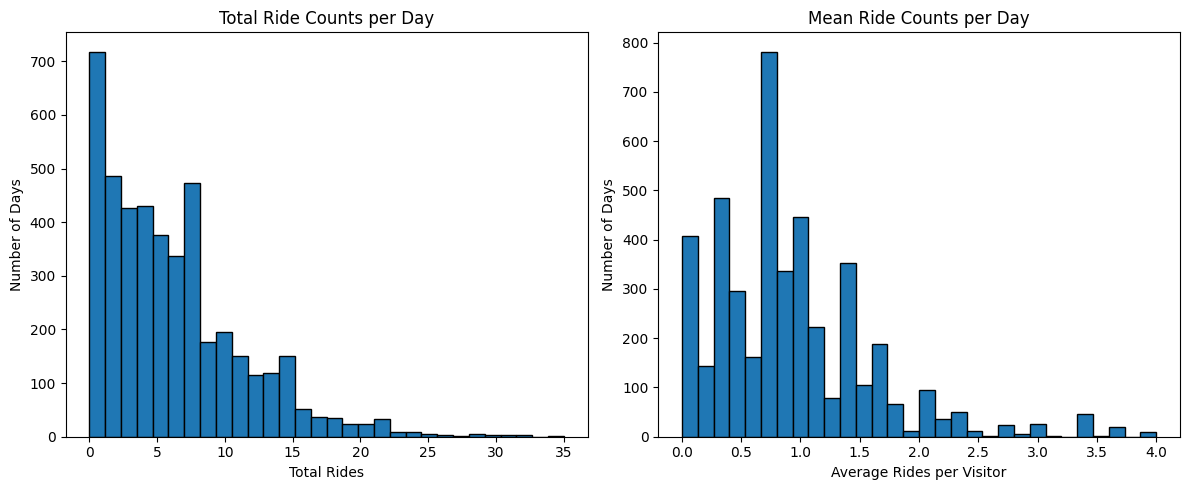

In [76]:
import matplotlib.pyplot as plt

daily = df.groupby("VisitDate")[["MartianRide", "TeacupRide", "RiverRide"]]

daily_total_rides = daily.sum().sum(axis=1)   
daily_mean_rides = daily.mean().mean(axis=1) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(daily_total_rides, bins=30, edgecolor='black')
plt.title("Total Ride Counts per Day")
plt.xlabel("Total Rides")
plt.ylabel("Number of Days")

plt.subplot(1, 2, 2)
plt.hist(daily_mean_rides, bins=30, edgecolor='black')
plt.title("Mean Ride Counts per Day")
plt.xlabel("Average Rides per Visitor")
plt.ylabel("Number of Days")

plt.tight_layout()
plt.show()

6. Make a bar chart showing the total number of Adult and Child participants.

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

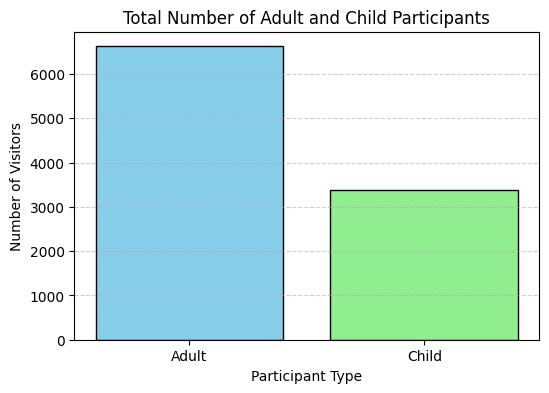

In [77]:
import matplotlib.pyplot as plt

participant_counts = df["IsAdult"].value_counts()
participant_counts.index = ["Adult" if val else "Child" for val in participant_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(participant_counts.index, participant_counts.values, color=["skyblue", "lightgreen"], edgecolor='black')
plt.title("Total Number of Adult and Child Participants")
plt.ylabel("Number of Visitors")
plt.xlabel("Participant Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

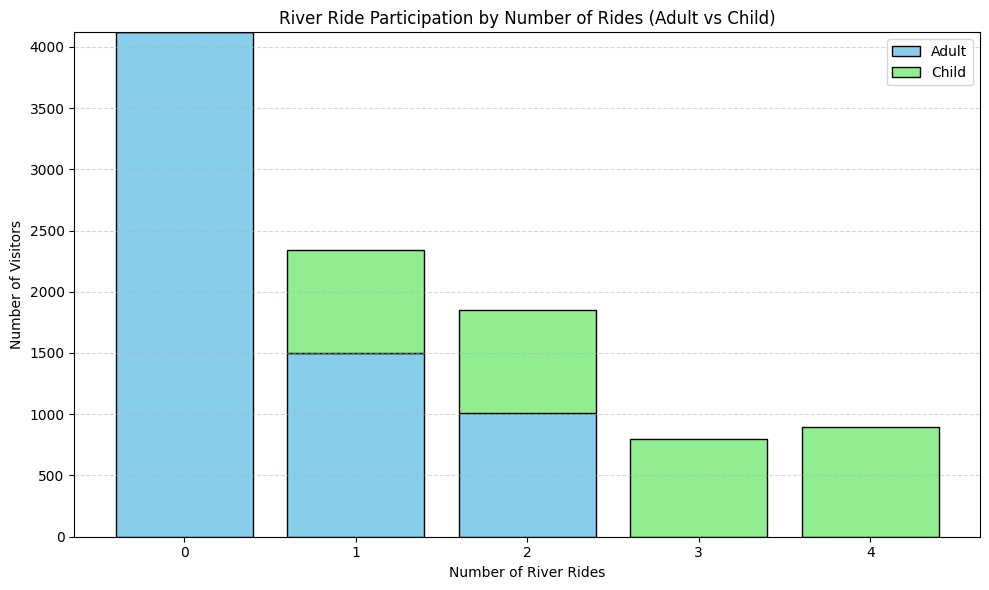

In [78]:

import pandas as pd
import matplotlib.pyplot as plt

dummies = pd.get_dummies(df["IsAdult"]).rename(columns={True: "Adult", False: "Child"})

df_with_flags = df.join(dummies)

ride_counts = df_with_flags.groupby("RiverRide")[["Adult", "Child"]].sum()

plt.figure(figsize=(10, 6))
x = ride_counts.index

plt.bar(x, ride_counts["Adult"], label="Adult", color="skyblue", edgecolor="black")
plt.bar(x, ride_counts["Child"], bottom=ride_counts["Adult"], label="Child", color="lightgreen", edgecolor="black")

plt.title("River Ride Participation by Number of Rides (Adult vs Child)")
plt.xlabel("Number of River Rides")
plt.ylabel("Number of Visitors")
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

8. Other tasks

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  (You can choose any aspect of the amusement park dataset to plot.)  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

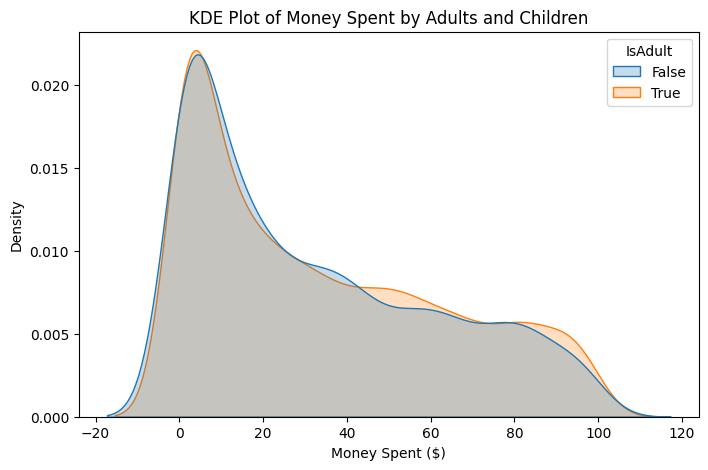

In [80]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="MoneySpent", hue="IsAdult", fill=True, common_norm=False)
plt.title("KDE Plot of Money Spent by Adults and Children")
plt.xlabel("Money Spent ($)")
plt.ylabel("Density")
plt.show()

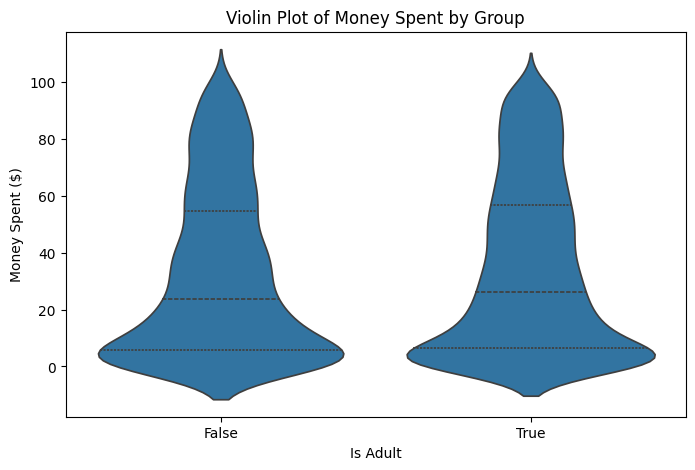

In [81]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="IsAdult", y="MoneySpent", inner="quartile")
plt.title("Violin Plot of Money Spent by Group")
plt.xlabel("Is Adult")
plt.ylabel("Money Spent ($)")
plt.show()

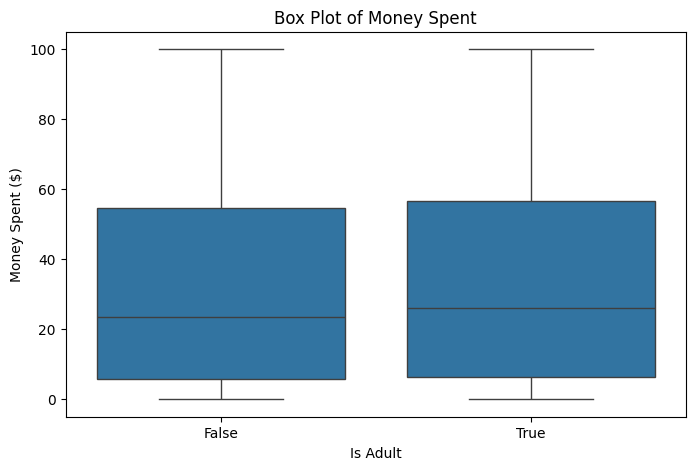

In [82]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="IsAdult", y="MoneySpent")
plt.title("Box Plot of Money Spent")
plt.xlabel("Is Adult")
plt.ylabel("Money Spent ($)")
plt.show()

Violin plot or KDE plot: For presentation or insight

Box plot: For statistical summary

swarm plot: For detailed data inspection 

# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

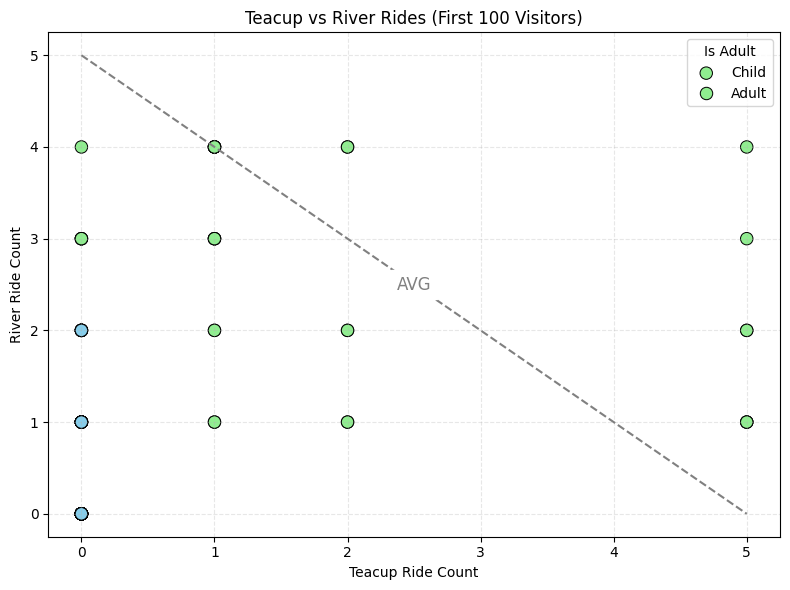

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_small = df.iloc[:100].copy()

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_small,
    x="TeacupRide",
    y="RiverRide",
    hue="IsAdult",
    palette={True: "skyblue", False: "lightgreen"},
    s=80,  # point size
    edgecolor='black'
)

plt.plot([0, 5], [5, 0], linestyle='--', color='gray', linewidth=1.5)
plt.text(2.5, 2.5, "AVG", fontsize=12, color="gray", ha="center", va="center", backgroundcolor="white")

plt.title("Teacup vs River Rides (First 100 Visitors)")
plt.xlabel("Teacup Ride Count")
plt.ylabel("River Ride Count")
plt.xticks(range(0, 6))
plt.yticks(range(0, 6))
plt.legend(title="Is Adult", labels=["Child", "Adult"])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()